# Data Cleaning and EDA

In [1]:
import matplotlib.pyplot as plt #imports
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
warnings.filterwarnings('ignore')

In [3]:
subreddit_df = pd.read_csv('../data/compiled_subreddit_data.csv') #read in data

### Feature Engineering

In [4]:
subreddit_df = subreddit_df[['subreddit', 'title', 'author']] #we are only really interested in predicting the subreddit based on the title

In [5]:
subreddit_df['title_length'] = [len(i) for i in subreddit_df['title']] #length of each title by characters

In [6]:
subreddit_df['title_word_count'] = [len(i.split()) for i in subreddit_df['title']] #length of each title by word count

In [7]:
subreddit_df = subreddit_df[subreddit_df['title_word_count'] >= 2] #titles that are only one word long we drop, hard to guess much from a one word title, will improve ourr esults

In [8]:
subreddit_df.isna().sum() #no null values yet, nothing to drop

subreddit           0
title               0
author              0
title_length        0
title_word_count    0
dtype: int64

In [9]:
subreddit_df['title'].drop_duplicates(inplace = True) # drop duplicate titles

In [10]:
subreddit_df['subreddit'].value_counts() #fairly close distriution

Bitcoin           9542
wallstreetbets    9235
Name: subreddit, dtype: int64

<AxesSubplot:title={'center':'Subreddit Distribution'}, xlabel='subreddit', ylabel='Count'>

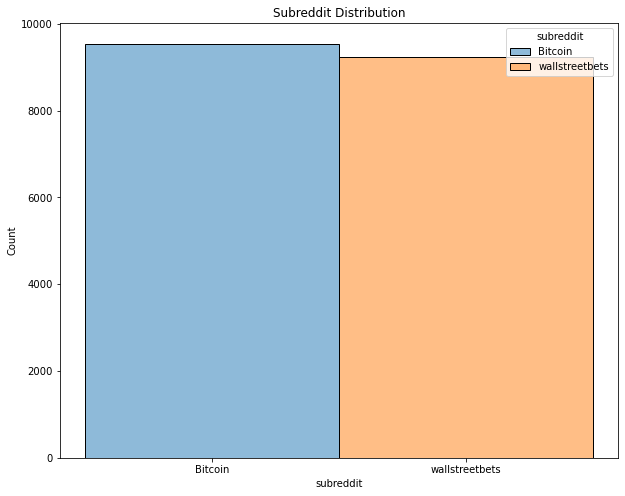

In [11]:
plt.figure(figsize= (10,8))
plt.title('Subreddit Distribution')
sns.histplot(x = 'subreddit', data = subreddit_df, hue = 'subreddit')

### Lematizing/Tokenizing our Titles

In [12]:
from nltk.stem import WordNetLemmatizer #let us clean and lemmatize/tokenize our titles
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords #imports

In [13]:
def clean_rev(title): #tokenizer function covered by Eric Bayless 
    my_tokenizer = RegexpTokenizer("[\w']+|\$[\d\.]+") 
    
    words = my_tokenizer.tokenize(title.lower())
    return words

In [14]:
clean_rev(subreddit_df['title'][3])[:10]

['can',
 'we',
 'have',
 'honest',
 'discussion',
 'about',
 'side',
 'effects',
 'which',
 'are']

In [15]:
def cleaner_rev(title): #covered with Eric Bayless during brunch hour
    my_tokenizer = RegexpTokenizer("[\w']+|\$[\d\.]+")
    lemmatizer = WordNetLemmatizer()
    
    words = my_tokenizer.tokenize(title.lower())
    
    stop_word_list = stopwords.words('english')
    no_stops = [i for i in words if i not in stop_word_list]
    
    title_lem = [lemmatizer.lemmatize(i) for i in no_stops]
    return " ".join(title_lem)

In [16]:
cleaner_rev(subreddit_df['title'][0])

'keep impressed s2fx model planb well predicts everything'

In [17]:
subreddit_df['clean_title'] = subreddit_df['title'].map(cleaner_rev) 
#we make all the titles lowercase, strip formatting, remove emojis, lemmatize and tokenize

In [18]:
subreddit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18777 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subreddit         18777 non-null  object
 1   title             18777 non-null  object
 2   author            18777 non-null  object
 3   title_length      18777 non-null  int64 
 4   title_word_count  18777 non-null  int64 
 5   clean_title       18777 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.6+ MB


In [19]:
subreddit_df.describe()

,title_length,title_word_count
count,18777.000000,18777.000000
mean,56.033818,9.977206
std,47.296418,8.408377
min,3.000000,2.000000
25%,25.000000,4.000000
50%,42.000000,8.000000
75%,70.000000,12.000000
max,308.000000,66.000000


In [20]:
subreddit_df.to_csv('../data/clean_data.csv', index = False) #save our clean titles to data folder

In [21]:
subreddit_df = pd.read_csv('../data/clean_data.csv')
subreddit_df

,subreddit,title,author,title_length,title_word_count,clean_title
0,Bitcoin,Keep being impressed by the S2FX model by Plan...,Scream1e,83,15,keep impressed s2fx model planb well predicts ...
1,Bitcoin,Perhaps someone will be able to support the fa...,bel-svoboda,76,14,perhaps someone able support family political ...
2,Bitcoin,Bears to the gulag!,heist95,19,4,bear gulag
3,Bitcoin,Can we have honest discussion about side effec...,Manic_Miner2,79,13,honest discussion side effect always positive
4,Bitcoin,Active nfl player going to convert full salary...,Crafty_Supermarket15,57,10,active nfl player going convert full salary bi...
...,...,...,...,...,...,...
18772,wallstreetbets,SNDL to the moon 🚀🚀🚀🚀🚀🚀 yolo!!,fk232323,30,6,sndl moon yolo
18773,wallstreetbets,I sent a gift to Ken Griffin at Citadel from A...,StockWizard_,119,21,sent gift ken griffin citadel amazon com guide...
18774,wallstreetbets,Ay bawse,z00tsuitnboogie,8,2,ay bawse
18775,wallstreetbets,GME/WSB Hype Vid (Haven't personally seen one ...,DistinguishedJB,90,18,gme wsb hype vid personally seen one week two ...


In [22]:
subreddit_df.isna().sum() #check for NaNs

subreddit            0
title                0
author               0
title_length         0
title_word_count     0
clean_title         38
dtype: int64

In [23]:
subreddit_df.dropna(inplace = True) #drop NanS

## EDA
#### Most Occuring Words Visualization

In [24]:
cvect = CountVectorizer()
dtm = cvect.fit_transform(subreddit_df['clean_title'])

In [25]:
dtm_array = dtm.toarray()

In [26]:
df2 = pd.DataFrame(dtm_array, columns = cvect.get_feature_names())

In [27]:
df2.sum().sort_values(ascending = False)[:20] #20 most popular words with our clean titles

bitcoin    3532
btc         858
buy         858
crypto      754
stock       712
moon        615
get         586
mvis        584
new         581
gme         554
time        508
short       507
market      488
like        482
coin        452
day         447
go          438
yolo        432
ape         422
money       395
dtype: int64

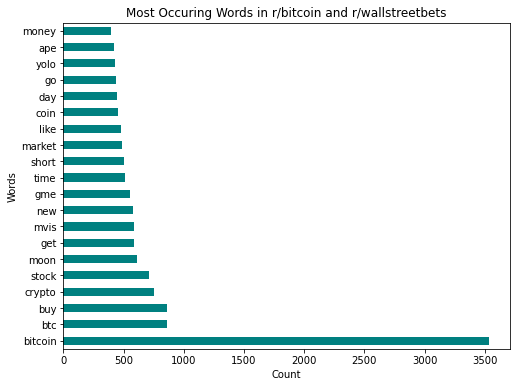

In [28]:
df2.sum().sort_values(ascending = False)[:20].plot(kind = 'barh', figsize = (8, 6), color = ['teal'])
plt.xlabel('Count')
plt.ylabel('Words');
plt.title('Most Occuring Words in r/bitcoin and r/wallstreetbets');
# we notice some words that are common in both subreddits like: moon, time, buy

In [29]:
#common words from each subreddit

In [30]:
dtm2 = cvect.fit_transform(subreddit_df.loc[subreddit_df['subreddit'] == 'Bitcoin']['clean_title'])

dtm2_array = dtm2.toarray()

df3 = pd.DataFrame(dtm2_array, columns = cvect.get_feature_names())

df3.sum().sort_values(ascending = False)[:20] #20 most frequent words with our clean titles

bitcoin        3532
btc             858
crypto          754
buy             456
wallet          320
get             319
new             291
dip             274
2021            262
coin            257
time            252
mining          251
market          249
price           243
coinbase        237
transaction     227
money           226
like            219
help            210
exchange        197
dtype: int64

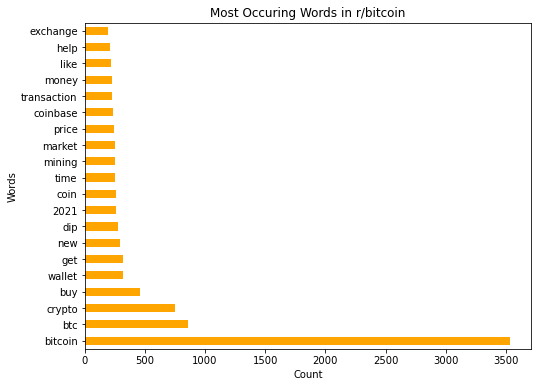

In [31]:
df3.sum().sort_values(ascending = False)[:20].plot(kind = 'barh', figsize = (8, 6), color = ['orange'])
plt.xlabel('Count')
plt.ylabel('Words');
plt.title('Most Occuring Words in r/bitcoin');

In [32]:
dtm3 = cvect.fit_transform(subreddit_df.loc[subreddit_df['subreddit'] == 'wallstreetbets']['clean_title'])
dtm3_array = dtm3.toarray()
df4 = pd.DataFrame(dtm3_array, columns = cvect.get_feature_names())
df4.sum().sort_values(ascending = False)[:20] 

stock      629
mvis       584
gme        552
moon       537
short      469
yolo       427
ape        420
buy        402
amc        324
share      294
new        290
go         287
let        284
get        267
day        267
like       263
time       256
going      240
market     239
squeeze    238
dtype: int64

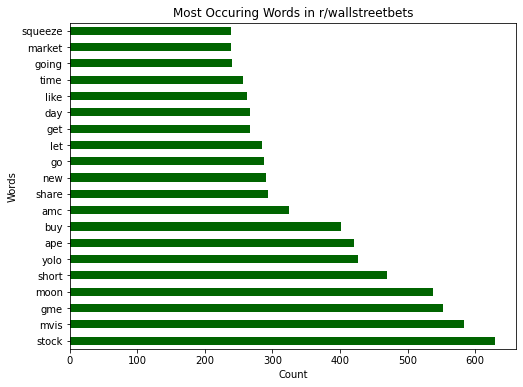

In [33]:
df4.sum().sort_values(ascending = False)[:20].plot(kind = 'barh', figsize = (8, 6), color = ['darkgreen'])
plt.xlabel('Count')
plt.ylabel('Words');
plt.title('Most Occuring Words in r/wallstreetbets');

### Unique Posting Users per Subreddit

In [34]:
unique_users = subreddit_df.groupby('subreddit')['author'].nunique() 

In [35]:
unique_users = pd.DataFrame(unique_users)

In [36]:
unique_users.T #solid amount of unique posters in our data

subreddit,Bitcoin,wallstreetbets
author,6175,6800


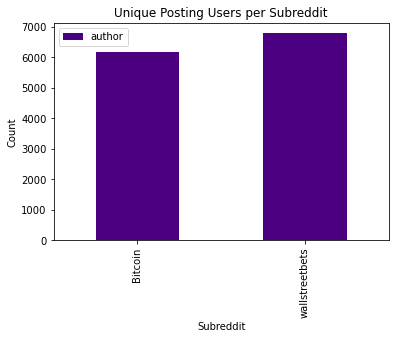

In [37]:
unique_users.plot(kind = 'bar', color = 'indigo');
plt.title('Unique Posting Users per Subreddit')
plt.ylabel('Count')
plt.xlabel('Subreddit');

### Word Count Distribution by Subreddit

In [38]:
btc_2 = subreddit_df.loc[subreddit_df['subreddit'] == 'Bitcoin']
wsb_2 = subreddit_df.loc[subreddit_df['subreddit'] == 'wallstreetbets'] #locate our subreddits in out subreddit_df as done before

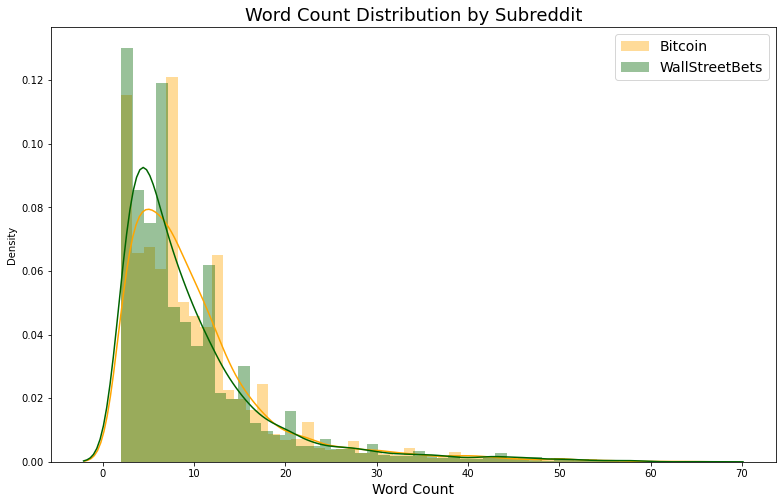

In [39]:
plt.figure(figsize = (13,8)) #plot the subreddits by title word count
sns.distplot(btc_2['title_word_count'], label = 'Bitcoin', color = 'orange'); #orange for bitcoin color
sns.distplot(wsb_2['title_word_count'], label = 'WallStreetBets', color = 'darkgreen'); #darkgreen for cashmoney

plt.title('Word Count Distribution by Subreddit', fontsize = 18)
plt.xlabel('Word Count', fontsize = 14)
plt.legend(fontsize = 14);
#we see alot of overlap!

### Average Word Count per Subreddit

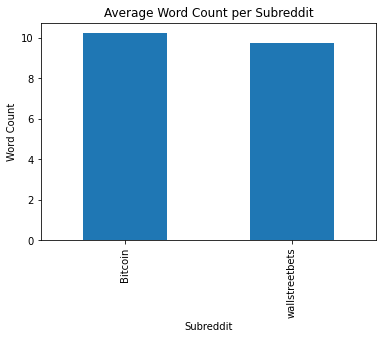

In [40]:
subreddit_df.groupby('subreddit')['title_word_count'].mean().plot(kind = 'bar')
plt.title('Average Word Count per Subreddit')
plt.ylabel('Word Count')
plt.xlabel('Subreddit');

In [41]:
subreddit_df.to_csv('../data/clean_data.csv', index = False) #save oura data again

In [42]:
subreddit_df

,subreddit,title,author,title_length,title_word_count,clean_title
0,Bitcoin,Keep being impressed by the S2FX model by Plan...,Scream1e,83,15,keep impressed s2fx model planb well predicts ...
1,Bitcoin,Perhaps someone will be able to support the fa...,bel-svoboda,76,14,perhaps someone able support family political ...
2,Bitcoin,Bears to the gulag!,heist95,19,4,bear gulag
3,Bitcoin,Can we have honest discussion about side effec...,Manic_Miner2,79,13,honest discussion side effect always positive
4,Bitcoin,Active nfl player going to convert full salary...,Crafty_Supermarket15,57,10,active nfl player going convert full salary bi...
...,...,...,...,...,...,...
18772,wallstreetbets,SNDL to the moon 🚀🚀🚀🚀🚀🚀 yolo!!,fk232323,30,6,sndl moon yolo
18773,wallstreetbets,I sent a gift to Ken Griffin at Citadel from A...,StockWizard_,119,21,sent gift ken griffin citadel amazon com guide...
18774,wallstreetbets,Ay bawse,z00tsuitnboogie,8,2,ay bawse
18775,wallstreetbets,GME/WSB Hype Vid (Haven't personally seen one ...,DistinguishedJB,90,18,gme wsb hype vid personally seen one week two ...


### Short Summary Statistics

In [43]:
subreddit_df.info() #18739 entries, solid amount

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18739 entries, 0 to 18776
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subreddit         18739 non-null  object
 1   title             18739 non-null  object
 2   author            18739 non-null  object
 3   title_length      18739 non-null  int64 
 4   title_word_count  18739 non-null  int64 
 5   clean_title       18739 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


In [44]:
subreddit_df.describe()

,title_length,title_word_count
count,18739.000000,18739.000000
mean,56.122739,9.990821
std,47.301940,8.411191
min,5.000000,2.000000
25%,25.000000,5.000000
50%,42.000000,8.000000
75%,70.000000,12.000000
max,308.000000,66.000000


In [45]:
subreddit_df.corr()

,title_length,title_word_count
title_length,1.000000,0.973184
title_word_count,0.973184,1.000000


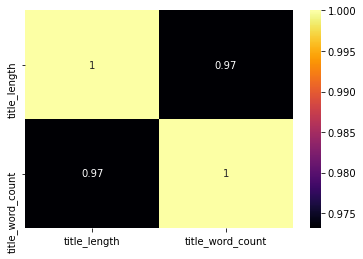

In [46]:
sns.heatmap(subreddit_df.corr(), annot = True, cmap = 'inferno'); #obvious correlation of title length and word count

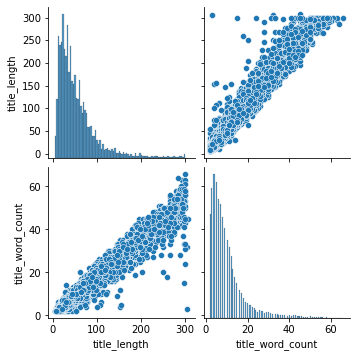

In [47]:
sns.pairplot(subreddit_df); #pairplot

# What we Found

Our Data is fairly balanced and subreddits are similarly distributed based on our different visualization. Good amount of unique users. We also found the most frequent words in each subreddit as well.

Distribution of word count per title is very close between subreddits too.

I suspect that although the subreddits titles have some overlap in terms, we will be able to accuratley predict
which Title came from each subreddit based off our our final clean dataset.

We have 18739 entires, almost evenly distributed between bitcoin/wallstreet bets.

It will be very interesting to see what our finals models will assess, excited to see how they perform.

Note: r/bitcoin has 2.8m members, wsb has 10m members